<br><br>
<h1 align="center"> 06 Data Preparation for ML </h1>
<br><br>

In [64]:
'''Import the libraries'''
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import hashlib
import joblib
import datetime
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

'''Use the ggplot style'''
plt.style.use('fivethirtyeight')
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255]]

In [46]:
'''Load the data. It's big, set low_memory=False'''
loan_data = pd.read_csv('/opt/apps/ml-data/bigdata/lending_club/loan_data.csv', low_memory=False)

In [3]:
print(loan_data.shape)

(1338224, 38)


In [4]:
cols = loan_data.columns
missing_value_count = 0
d = []
d_types = loan_data.dtypes

for ind, col in enumerate(cols):
    missing_value_count = loan_data[col].isnull().sum()
    

    d.append({'Columns': col, 'Missing Values': missing_value_count, 'Data Type': d_types[col], 
              'Unique Values': loan_data[col].nunique()})
    missing_value_count = 0
    
    
loan_data_info = pd.DataFrame(d)

display(HTML(loan_data_info.to_html()))  

,Columns,Missing Values,Data Type,Unique Values
0,loan_amnt,0,int64,1558
1,term,0,object,2
2,int_rate,0,float64,654
3,installment,0,float64,83364
4,grade,0,object,7
5,sub_grade,0,object,35
6,emp_length,0,object,11
7,home_ownership,0,object,6
8,annual_inc,0,float64,64147
9,verification_status,0,object,3


In [5]:
'''Drop selected columns, not needed for ML'''
loan_data = loan_data.drop(['earliest_cr_line', 'issue_d', 'loan_status'], axis = 1)

In [6]:
print(loan_data.shape)

(1338224, 35)


In [7]:
'''Create the numeric target variable'''


def create_risk_n(risk_b):
    if risk_b == 'Risk':
        return 1
    elif risk_b == 'No Risk':
        return 0
    

loan_data['risk_n'] = loan_data['Risk'].apply(create_risk_n)

loan_data.reset_index(drop=True, inplace=True)

In [8]:
loan_data['Risk'].value_counts()

No Risk    1041952
Risk        296272
Name: Risk, dtype: int64

In [9]:
loan_data['risk_n'].value_counts()

0    1041952
1     296272
Name: risk_n, dtype: int64

In [10]:
loan_data = loan_data.drop(['Risk'], axis = 1)
loan_data.reset_index(drop=True, inplace=True)

In [11]:
print(loan_data.shape)

(1338224, 35)


In [12]:
cols = loan_data.columns
missing_value_count = 0
d = []
d_types = loan_data.dtypes

for ind, col in enumerate(cols):
    missing_value_count = loan_data[col].isnull().sum()
    

    d.append({'Columns': col, 'Missing Values': missing_value_count, 'Data Type': d_types[col], 
              'Unique Values': loan_data[col].nunique()})
    missing_value_count = 0
    
    
loan_data_info = pd.DataFrame(d)

display(HTML(loan_data_info.to_html()))  

,Columns,Missing Values,Data Type,Unique Values
0,loan_amnt,0,int64,1558
1,term,0,object,2
2,int_rate,0,float64,654
3,installment,0,float64,83364
4,grade,0,object,7
5,sub_grade,0,object,35
6,emp_length,0,object,11
7,home_ownership,0,object,6
8,annual_inc,0,float64,64147
9,verification_status,0,object,3


In [13]:
'''Lets look at No Risk and Risk loans, we need to have the same ratio for the training set nd test set'''
loan_data['risk_n'].value_counts()/len(loan_data['risk_n'])

0    0.778608
1    0.221392
Name: risk_n, dtype: float64

In [14]:
'''Split the data to 80% training set and 20% test set'''
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)

for train_set, test_set in stratified.split(loan_data, loan_data["risk_n"]):
    stratified_train = loan_data.loc[train_set]
    stratified_test = loan_data.loc[test_set]
    
print('Train Set Ratio \n', stratified_train["risk_n"].value_counts()/len(stratified_train))
print('Test Set Ratio \n', stratified_test["risk_n"].value_counts()/len(stratified_test))

Train Set Ratio 
 0    0.778608
1    0.221392
Name: risk_n, dtype: float64
Test Set Ratio 
 0    0.778608
1    0.221392
Name: risk_n, dtype: float64


In [15]:
'''Lets prepare the data'''
train_df = stratified_train
test_df = stratified_test

# Let's Shuffle the data
train_df = train_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)

In [16]:
# Train set (Normal training dataset)
X_train = train_df.drop('risk_n', axis=1)
y_train = train_df['risk_n']


# Test Dataset
X_test = test_df.drop('risk_n', axis=1)
y_test = test_df['risk_n']

In [17]:
X_test.shape

(669112, 34)

In [18]:
'''Separate numeric and categorical features'''
numeric = X_train.select_dtypes(exclude=["object"])
categorical = X_train.select_dtypes(["object"])

In [19]:
num_attribs = list(numeric)
cat_attribs = list(categorical)

In [20]:
len(num_attribs)

22

In [21]:
len(cat_attribs)

12

In [22]:
'''Separate numeric and categorical features'''
numeric = X_test.select_dtypes(exclude=["object"])
categorical = X_test.select_dtypes(["object"])

In [23]:
num_attribs

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'inq_fi',
 'inq_last_12m',
 'mort_acc',
 'age_of_credit_in_days']

In [24]:
cat_attribs

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'application_type',
 'hardship_flag',
 'disbursement_method']

In [25]:
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

        
    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    
    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [26]:
'''
Transformation and Feature Scaling:
All transformation pipelines in one place.
'''
class DataFrameSelector1(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

    
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]


class CustomLabelBinarizer(BaseEstimator, TransformerMixin):
    
    def __init__(self, sparse_output=False):
          self.sparse_output = sparse_output
    
    def fit(self, X, y=None):
        self.enc = LabelBinarizer(sparse_output=self.sparse_output)
        self.enc.fit(X)
        return self
    
    def transform(self, X, y=None):
          return self.enc.transform(X)
        

class CustomBinarizer(BaseEstimator, TransformerMixin):
    
    def __init__(self, sparse_output=False):
          self.sparse_output = sparse_output
    
    def fit(self, X, y=None):
        self.label_binarizer_ = LabelBinarizer(sparse_output=self.sparse_output).fit(X)
        return self
    
    def transform(self, X):
        return self.label_binarizer_.transform(X)


num_pipeline = Pipeline([
                        ('selector', DataFrameSelector(num_attribs)),
                        ('std_scaler', StandardScaler()),
                        ])

cat_pipeline = Pipeline([
                        ('selector', DataFrameSelector(cat_attribs)),
                        ('encoder', CategoricalEncoder(encoding="onehot-dense")),
                        ])

full_pipeline = FeatureUnion(transformer_list=[
                            ("num_pipeline", num_pipeline),
                            ("cat_pipeline", cat_pipeline),
                            ])

In [27]:
'''Transform the data using pipeline'''
print("Raw Data: ", X_train.shape)
X_train_prepared = full_pipeline.fit_transform(X_train)
print("Prepared Data: ", X_train_prepared.shape)

Raw Data:  (669112, 34)
Prepared Data:  (669112, 159)


In [28]:
'''Transform the data using pipeline'''
print("Raw Data: ", X_test.shape)
X_test_prepared = full_pipeline.fit_transform(X_test)
print("Prepared Data: ", X_test_prepared.shape)

Raw Data:  (669112, 34)
Prepared Data:  (669112, 159)


In [32]:
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(X_train_prepared, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_score = log_reg.predict(X_test_prepared)
print(accuracy_score(y_test, y_score))

0.7835698657324932


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.717


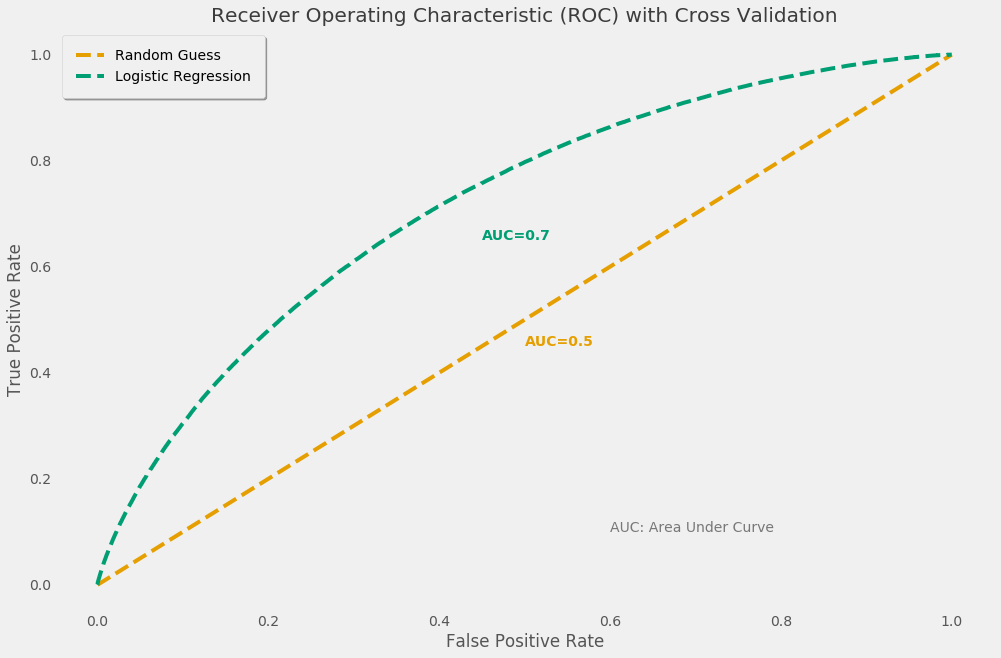

In [106]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = log_reg.predict_proba(X_test_prepared)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Guess', color=colors[1])
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='Logistic Regression', color=colors[3])
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) with Cross Validation', alpha=0.75)

plt.text(x=0.45, y=0.65, s='AUC=%.1f' % (lr_auc), weight='bold', color=colors[3])
plt.text(x=0.5, y=0.45, s='AUC=%.1f' % (ns_auc), weight='bold', color=colors[1])
plt.text(x=0.6, y=0.1, s='AUC: Area Under Curve', alpha=0.5)
# show the legend
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc='upper left')
# show the plot

plt.savefig('plots/32.png', bbox_inches="tight")
plt.show()

Logistic: f1=0.166 auc=0.412


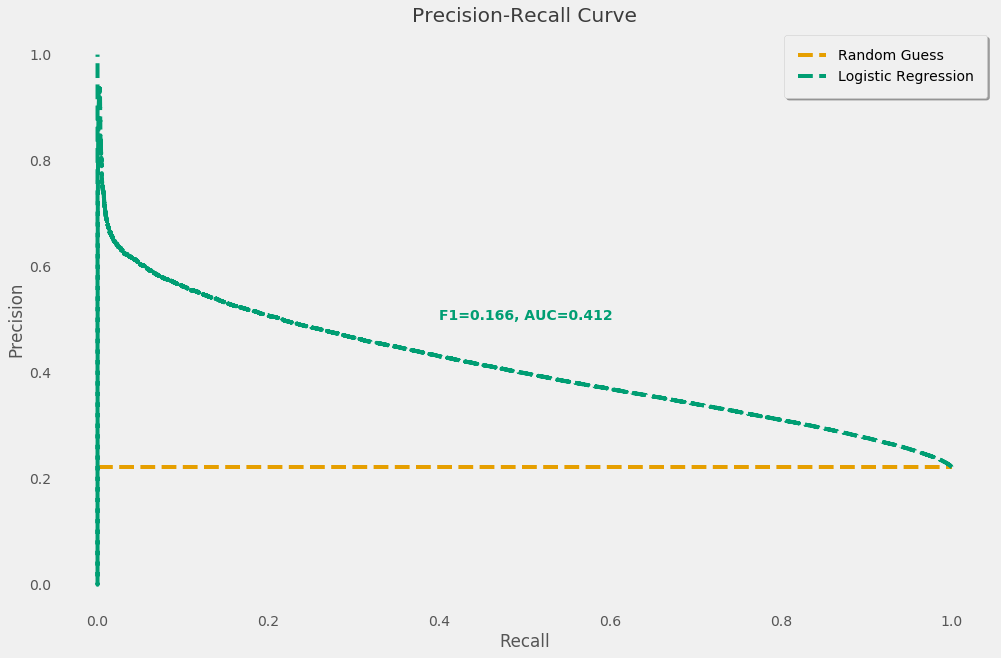

In [107]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))
# predict class values
yhat = log_reg.predict(X_test_prepared)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Random Guess', color=colors[1])
plt.plot(lr_recall, lr_precision, linestyle='--', label='Logistic Regression', color=colors[3])
plt.title('Precision-Recall Curve', alpha=0.75)

plt.text(x=0.4, y=0.5, s='F1=%.3f, AUC=%.3f' % (lr_f1, lr_auc), weight='bold', color=colors[3])
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc='upper right')
# show the plot
plt.savefig('plots/33.png', bbox_inches="tight")
plt.show()

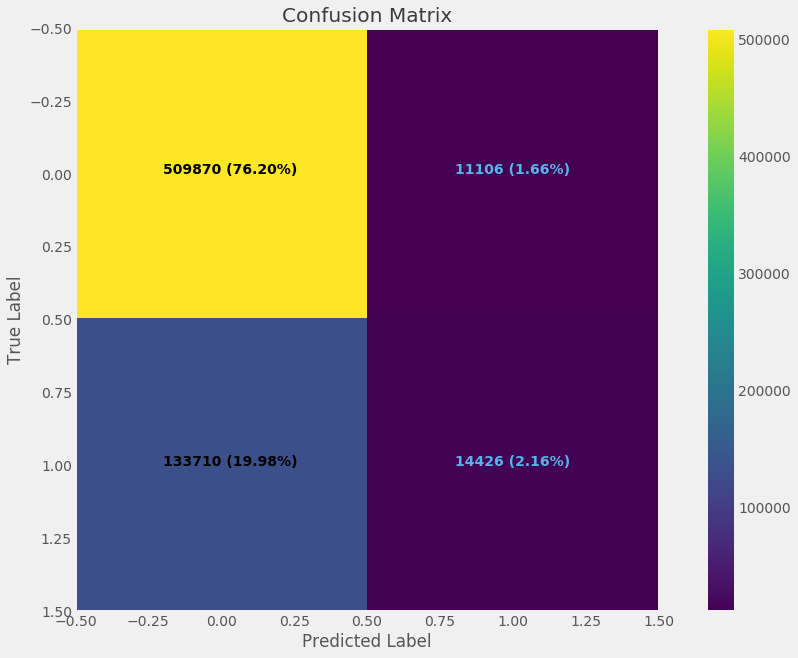

In [108]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))
plt.rcParams["axes.grid"]=False

'''compute confusion matrix'''
cm = confusion_matrix(y_test, y_score)

# print(cm)

'''show confusion matrix in a separate window'''
plt.imshow(cm)
plt.title('Confusion Matrix', alpha=0.75)
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.text(x=-0.2, y=0, s='509870 (%.2f%%)' % (50987000/len(X_test_prepared)), weight='bold', color=colors[0])
plt.text(x=-0.2, y=1, s='133710 (%.2f%%)' % (13371000/len(X_test_prepared)), weight='bold', color=colors[0])
plt.text(x=0.8, y=0, s='11106 (%.2f%%)' % (1110600/len(X_test_prepared)), weight='bold', color=colors[2])
plt.text(x=0.8, y=1, s='14426 (%.2f%%)' % (1442600/len(X_test_prepared)), weight='bold', color=colors[2])


plt.savefig('plots/34.png', bbox_inches="tight")
plt.show()